## Setup Inicial

In [1]:
import tensorflow as tf
import cv2 as cv
import os
from imghdr import what
import matplotlib.pyplot as plt
import shutil
import random
import pathlib
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.10.1'

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

print(f"-> {tf.config.list_physical_devices('GPU')}")

Default GPU Device:/device:GPU:0
-> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


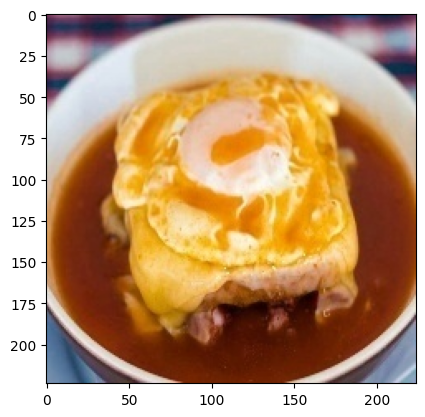

In [14]:
img = cv.imread('assets/francesinha/510.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Tratamento dos Dados

#### Remover possíveis imagens irreconhecíveis pelo Python

In [17]:
extensoes = ['jpeg', 'png', 'jpg', 'JPG', 'JPEG', 'PNG']

In [18]:
os.listdir('assets')

['aletria',
 'arroz_cabidela',
 'baba_camelo',
 'bacalhau_bras',
 'bacalhau_natas',
 'bola_berlim',
 'bolinhos_bacalhau',
 'bolo_bolacha',
 'cabrito',
 'caldo_verde',
 'canja',
 'carne_porco_alentejana',
 'cozido_portuguesa',
 'esparguete_bolonhesa',
 'feijoada',
 'francesinha',
 'jardineira',
 'leite_creme',
 'pao_de_lo',
 'pastel_nata',
 'rabanada',
 'rojoes',
 'tarte_maca',
 'tripas_moda_porto']

In [8]:
for class_imagem in os.listdir('assets'): 
    for imagem in os.listdir(os.path.join('assets', class_imagem)): # Para todas as pastas de imagens
        path_imagem = os.path.join('assets', class_imagem, imagem) # Cada imagem em cada pasta
        try:
            img = cv.imread(path_imagem) # Abrir a imagem
            tip = what(path_imagem)
            if tip not in extensoes:
                print('Imagem não compatível com a leitura Python, a remover a imagem {}'.format(path_imagem))
                os.remove(path_imagem)
        except Exception as e:
            print('Erro com a imagem {}'.format(path_imagem))

Imagem não compatível com a leitura Python, a remover a imagem assets\cozido_portuguesa\45272209_10156440717688935_1152763853537280000_n.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\cozido_portuguesa\Cozido-a-portuguesa-1024x768.webp
Imagem não compatível com a leitura Python, a remover a imagem assets\cozido_portuguesa\cozido-a-portuguesa1.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\cozido_portuguesa\cozido-C3A0-portuguesa.gif
Imagem não compatível com a leitura Python, a remover a imagem assets\cozido_portuguesa\cozido-portuguesa-1.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\cozido_portuguesa\cozido-portuguesa-2.jpg
Imagem não compatível com a leitura Python, a remover a imagem assets\cozido_portuguesa\DSC_5911_blog.jpg


#### Transformar todas as imagens para terem o mesmo tamanho

In [10]:
for pasta in os.listdir('assets'): 
    subpasta = os.path.join('assets', pasta)
    
    for imagem in os.listdir(subpasta):
        if imagem.endswith('.jpeg') or imagem.endswith('.png') or imagem.endswith('.jpg') or imagem.endswith('.JPG') or imagem.endswith('.JPEG') or imagem.endswith('.PNG'):
            # Ler a imagem
            img = cv.imread(os.path.join(subpasta, imagem))

            # Colocar imagens todas no mesmo tamanho
            img = cv.resize(img, (224,224))

            # Colocar as imagens no formato RGB
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

            # Gravar a nova imagem
            cv.imwrite(os.path.join(subpasta, imagem), img)

#### Renomear as imagens em numeros

In [11]:
assets = 'assets'

# Entrar em todas as subpastas dos assets
for sub in os.listdir(assets):
    subpasta = os.path.join(assets, sub)
    
    # Se for uma pasta, continua
    if os.path.isdir(subpasta):
        # Contador para renomear as imagens a começar a 1
        i = 1
        
        # Fazer um loop para todas as imagens
        for nome_imagem in os.listdir(subpasta):
            caminho = os.path.join(subpasta, nome_imagem)

            # Verificar se o ficheiro não é uma pasta e tem uma extensão de uma imagem
            if os.path.isfile(caminho) and nome_imagem.endswith(('.jpg', '.jpeg', '.png', '.JPG', '.JPEG', 'PNG')):
            
                # Gerar novo nome para imagem
                novo_nome = str(i) + ".jpg"   # Mudar a extensão das imagens para jpg, caso nao esteja
                
                # Verificar se o novo nome já existe em alguma das imagens
                while os.path.exists(os.path.join(subpasta, novo_nome)):
                    i += 1
                    novo_nome = str(i) + ".jpg"   # Mudar a extensão das imagens para jpg, caso nao esteja
                
                # Renomear as imagens
                os.rename(caminho, os.path.join(subpasta, novo_nome))

            # Incrementar o contador para a próxima imagem
            i += 1

#### Balanceamento dos Dados

In [8]:
for pastas in os.listdir('assets'): 
    if os.path.isdir(os.path.join('assets', pastas)):
        counter = 0
        for imagem in os.listdir(os.path.join('assets', pastas)):
            if imagem.endswith(".jpg"):
                counter += 1

        print(f"{pastas}: {counter}")

aletria: 200
arroz_cabidela: 200
baba_camelo: 200
bacalhau_bras: 200
bacalhau_natas: 200
bola_berlim: 200
bolinhos_bacalhau: 200
bolo_bolacha: 200
cabrito: 200
caldo_verde: 200
canja: 200
carne_porco_alentejana: 200
cozido_portuguesa: 200
esparguete_bolonhesa: 200
feijoada: 200
francesinha: 200
jardineira: 200
leite_creme: 200
pao_de_lo: 200
pastel_nata: 200
rabanada: 200
rojoes: 200
tarte_maca: 200
tripas_moda_porto: 200


In [7]:
# Balancear os dados para todos os pratos terem o mesmo número de imagems
for pasta in os.listdir('assets'):
    path_pasta = os.path.join('assets', pasta)
    if os.path.isdir(path_pasta):
        imagens = os.listdir(path_pasta)
        while len(imagens) > 200:
            imagem_random = random.choice(imagens)
            os.remove(os.path.join(path_pasta, imagem_random))
            imagens.remove(imagem_random)


#### Divisão dos Dados

In [2]:
# Listas vazias para guardar os paths das imagens e as suas labels
path_imagens = []
labels = []

In [3]:
# Obter os paths e as labels das imagens
for label in os.listdir('assets'):
    pasta_label = os.path.join('assets', label)
    if os.path.isdir(pasta_label):
        for imagem in os.listdir(pasta_label):
            caminho_imagem = os.path.join(pasta_label, imagem)
            path_imagens.append(caminho_imagem)
            labels.append(label)

# Dividir os dados em dados de treino e dados de validação
img_treino, img_validacao, labels_treino, labels_validacao = train_test_split(path_imagens, labels, test_size=0.25, random_state=2023)

# Print do numero de amostras dos dados de treino, validação e teste
print('Amostras de treino:',len(img_treino))
print('Amostras de validação:',len(img_validacao))

Amostras de treino: 3600
Amostras de validação: 1200


In [22]:
# Mover as imagens para as pastas correspondentes
for image_path, label in zip(img_treino, labels_treino):
    label_dir = os.path.join('treino', label)
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(image_path, os.path.join(label_dir, os.path.basename(image_path)))

for image_path, label in zip(img_validacao, labels_validacao):
    label_dir = os.path.join('validacao', label)
    os.makedirs(label_dir, exist_ok=True)
    shutil.copy(image_path, os.path.join(label_dir, os.path.basename(image_path)))

#### Data Augmentation

In [5]:
path_treino = "treino\\"
path_validacao = "validacao\\"
#Rescale data and create data generator instances
train_datagenerator = ImageDataGenerator(rescale=1/255.)
test_datagenerator = ImageDataGenerator(rescale=1/255.)
train_datagenerator_augmentation = ImageDataGenerator(rescale = 1/255.,
                                                      rotation_range=20, #rotate the image
                                                      zoom_range = 0.2,#zoom the image
                                                      width_shift_range=0.2, #shift the image horizontally
                                                      height_shift_range=0.2, #shift the image vertically
                                                      horizontal_flip=True, #flip the image on horizontal axis
                                                      vertical_flip=True, #flip the image on vertical axis
                                                      shear_range = 0.2) #Shear the image



In [6]:
#Load data in from images and turn into batches
train_data = train_datagenerator.flow_from_directory(path_treino,
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode='categorical'
                                                    )
test_data = train_datagenerator.flow_from_directory(path_validacao,
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode='categorical'
                                                    )
train_data_augmented = train_datagenerator_augmentation.flow_from_directory(path_treino,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode='categorical',
                                                                            shuffle=True)

Found 3600 images belonging to 24 classes.
Found 1200 images belonging to 24 classes.
Found 3600 images belonging to 24 classes.


## Rede Neuronal

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64,kernel_size=(5,5), input_shape = (224,224,3), activation='relu'),
    tf.keras.layers.Conv2D(64,kernel_size=(5,5), activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.01),

    tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'),
    tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.01),

    tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'),
    tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.01),

    tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'),
    tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.01),
    
    #tf.keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'),
    #tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    #tf.keras.layers.Dropout(0.01),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24,activation='softmax')

])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay = 0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              )

In [9]:
history = model.fit(train_data_augmented,
                    epochs = 300,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/300
113/113 [==============================] - 55s 409ms/step - loss: 3.1779 - accuracy: 0.0414 - val_loss: 3.1759 - val_accuracy: 0.0525
Epoch 2/300
113/113 [==============================] - 30s 260ms/step - loss: 3.1172 - accuracy: 0.0558 - val_loss: 3.0660 - val_accuracy: 0.0742
Epoch 3/300
113/113 [==============================] - 30s 261ms/step - loss: 3.0302 - accuracy: 0.0678 - val_loss: 3.0031 - val_accuracy: 0.0858
Epoch 4/300
113/113 [==============================] - 29s 259ms/step - loss: 3.0066 - accuracy: 0.0786 - val_loss: 2.9776 - val_accuracy: 0.0858
Epoch 5/300
113/113 [==============================] - 29s 260ms/step - loss: 2.9941 - accuracy: 0.0825 - val_loss: 2.9647 - val_accuracy: 0.0783
Epoch 6/300
113/113 [==============================] - 30s 263ms/step - loss: 2.9768 - accuracy: 0.0936 - val_loss: 2.9415 - val_accuracy: 0.1108
Epoch 7/300
113/113 [==============================] - 31s 272ms/step - loss: 2.9364 - accuracy: 0.1100 - val_loss: 2.8429 -

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 108, 108, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 108, 108, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 104, 64)      102464    
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      102464    
                                                        

In [11]:
model.evaluate(test_data)

38/38 [==============================] - 2s 38ms/step - loss: 0.9483 - accuracy: 0.7783


[0.9483126997947693, 0.778333306312561]

In [12]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

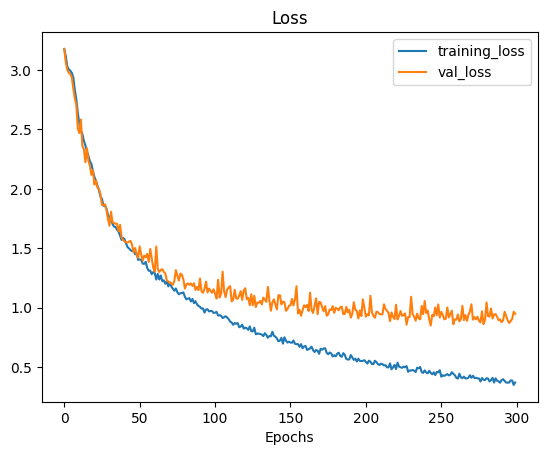

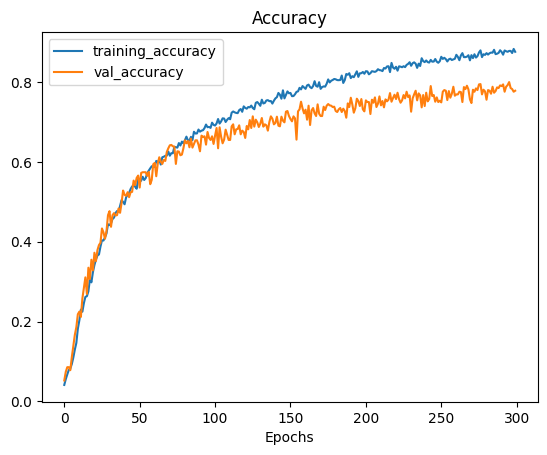

In [13]:
plot_loss_curves(history)

In [14]:
class_dir = pathlib.Path("treino\\")
name_Classes = np.array(sorted(item.name for item in class_dir.glob('*')))
print(name_Classes)

['aletria' 'arroz_cabidela' 'baba_camelo' 'bacalhau_bras' 'bacalhau_natas'
 'bola_berlim' 'bolinhos_bacalhau' 'bolo_bolacha' 'cabrito' 'caldo_verde'
 'canja' 'carne_porco_alentejana' 'cozido_portuguesa'
 'esparguete_bolonhesa' 'feijoada' 'francesinha' 'jardineira'
 'leite_creme' 'pao_de_lo' 'pastel_nata' 'rabanada' 'rojoes' 'tarte_maca'
 'tripas_moda_porto']


In [15]:
def prep_Image(inputImage, img_shape = 224):

    img = tf.io.read_file(inputImage) #Reads Image

    img = tf.image.decode_image(img, channels = 3) # decode image into a tensor with 3 color channels
    img = tf.image.resize(img, size = [img_shape, img_shape]) # reshape img
    img = img/255 #normalize image

    return img

In [16]:
def predict_and_plot(model, image, class_names):

    img = prep_Image(image) #Prepare the image for classification

    prediction = model.predict(tf.expand_dims(img, axis = 0)) #Make a prediction

    if (len(prediction[0]) > 1):
        pred_classes = name_Classes[prediction.argmax()] #more than one output, takes the maximum
    else:
        pred_classes = name_Classes[int(tf.round(prediction)[0][0])]

    #displaying results
    plt.imshow(img)
    plt.title(f"Prediction: {pred_classes}")
    plt.axis(False);

    return pred_classes

1/1 [==============================] - 0s 20ms/step


'francesinha'

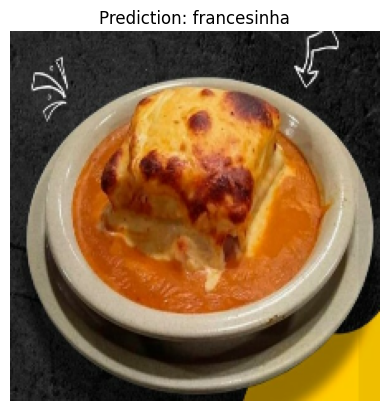

In [48]:
predict_and_plot(model, "testes/irm.jpg", name_Classes)

In [ ]:
#Save model
model.save("SavedModel")

In [28]:
#Loading Model
loaded_Model = tf.keras.models.load_model("SavedModel")
loaded_Model.evaluate(test_data)

38/38 [==============================] - 2s 36ms/step - loss: 0.9483 - accuracy: 0.7783


[0.9483134150505066, 0.778333306312561]

1/1 [==============================] - 0s 18ms/step


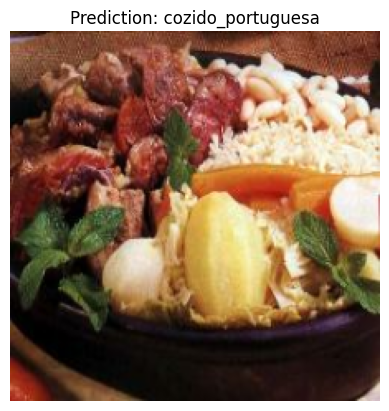

1/1 [==============================] - 0s 19ms/step


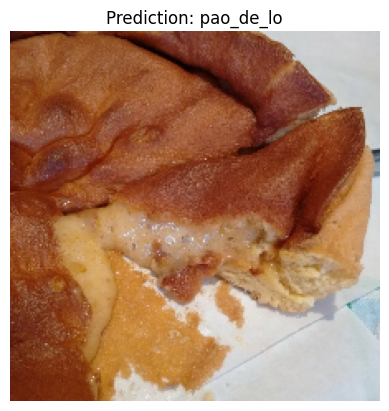

1/1 [==============================] - 0s 18ms/step


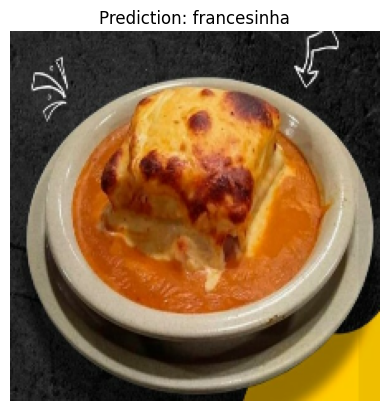

In [49]:
for file in os.listdir("testes"):
    predict_img = os.path.join("testes", file)
    plt.figure()
    predict_and_plot(loaded_Model, predict_img, name_Classes)
    plt.show()